In [1]:
import sys, json
sys.path.insert(0, r'C:\Users\tglaubach\repos\pydocmaker\src')

In [2]:
import pydocmaker as pyd

# Example on how to Export Reports to redmine as a wiki page

This example is based on the example `01_example_build_doc.ipynb` but can also be read individually.

**NOTE:** All steps taken here can be done for both `FlowDoc` and `SectionedDoc`

## Let's Build an Example Document To Upload


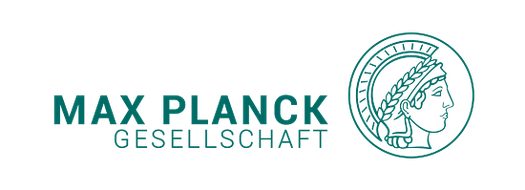

In [3]:
doc = pyd.SectionedDoc()

# this will add a section 'Introduction'
doc.add_section('Introduction')

# now I can add / access the section (which is a DocBuilderder) direcly like a dict
doc['Introduction'].add('dummy text which will be added to the introduction')

# this will add the section 'Weather Info' and add a markdown element to it
doc.add_kw('Second Chapter', 'markdown', 'This is my fancy `markdown` text for the Second Chapter')

# I can also add parts to the Introduction like this
doc.add_kw('Introduction', 'verbatim', 'def hello_world():\n   print("hello world!")')

# and like this
doc.add('Second Chapter', pyd.constr.image_from_link("https://github.githubassets.com/assets/GitHub-Mark-ea2971cee799.png"))


doc.show()

# Export as Redmine

In [15]:
# here we can not save to a file, but only return the exported values
text_textile, attachments_lst = doc.to_redmine()

print(text_textile[:100] + '...\n(rest omitted for brevity)')

print('-'*100)
print('Attachments')
print('-'*100)
for a in attachments_lst:
    print(a.get('filename'), type(a.get('path')), a.get('content_type'))

# this we can use to upload to redmine, but not save to a file directly

h2.  Introduction



dummy text which will be added to the introduction



<pre>def hello_world():
 ...
(rest omitted for brevity)
----------------------------------------------------------------------------------------------------
Attachments
----------------------------------------------------------------------------------------------------
doc_dict.json <class '_io.BytesIO'> application/octet-stream
Logo_of_the_Max_Planck_Society.png <class '_io.BytesIO'> application/octet-stream


In [ ]:
import redminelib, datetime


# Replace with your Redmine instance URL, and token
my_server = 'https://your-redmine-instance.com'
my_token = ''
page_title = 'My Wiki Page'
project_id = 'myproject'



redmine = redminelib.Redmine(my_server, key=my_token)


page = redmine.wiki_page.new()
page.project_id = project_id
page.title = page_title

page.text = text_textile
page.uploads = attachments_lst
page.comments = f'updated at {datetime.datetime.utcnow().isoformat()}'
page.save()


print("Wiki page created successfully.")

